In [1]:
%matplotlib notebook
from spatialmath import *
from spatialmath.base import *
import matplotlib.pyplot as plt
from math import pi
import numpy as np
import sympy as sp


# extendemos la clase SE3 para poder manejar variables en forma simbolica y numérica
# USO: objeto.symbolReplace([(simbolo1, valor_simbolo1),(simboloN, valor_simboloN)])
class SE3(SE3):
    def symbolReplace(self,symbol_values):
        aux = np.eye(self.A.shape[0])
        for i in range(self.A.shape[0]):
            for j in range(self.A.shape[1]):
                try:
                    aux[i,j] = self.A[i,j].subs(symbol_values).evalf()
                except:
                    pass
        return aux

In [2]:
# Definimos simbolos a utilizar
q1,l1, q2, l2 = sp.symbols('Q1,L1,Q2,L2')

In [3]:
R0 = SE3()
A01 = SE3.Rz(q1) * SE3.Tx(l1)
R1 = R0 * A01

In [4]:
R1_eval = A01.symbolReplace([(q1,pi/2),(l1,2)])
R1_eval

array([[ 6.1232340e-17, -1.0000000e+00,  0.0000000e+00,  1.2246468e-16],
       [ 1.0000000e+00,  6.1232340e-17,  0.0000000e+00,  2.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [5]:
A12 = SE3.Rz(q2) * SE3.Tx(l2)
print(A12)

  cos(Q2)      -sin(Q2)     0            L2*cos(Q2)    
  sin(Q2)      cos(Q2)      0            L2*sin(Q2)    
   0         0         1        0             
   0         0         0        1             



In [6]:
T = A01 * A12
T = T.simplify()
print(T)
T_eval = T.symbolReplace([(q1,pi/2),(l1,10),(q2,pi/2),(l2,10)])
T_eval

  cos(Q1 + Q2) -sin(Q1 + Q2) 0            L1*cos(Q1) + L2*cos(Q1 + Q2)  
  sin(Q1 + Q2) cos(Q1 + Q2) 0            L1*sin(Q1) + L2*sin(Q1 + Q2)  
  0            0            1            0             
  0            0            0            1             



array([[-1.0000000e+00, -1.2246468e-16,  0.0000000e+00, -1.0000000e+01],
       [ 1.2246468e-16, -1.0000000e+00,  0.0000000e+00,  1.0000000e+01],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

<IPython.core.display.Javascript object>


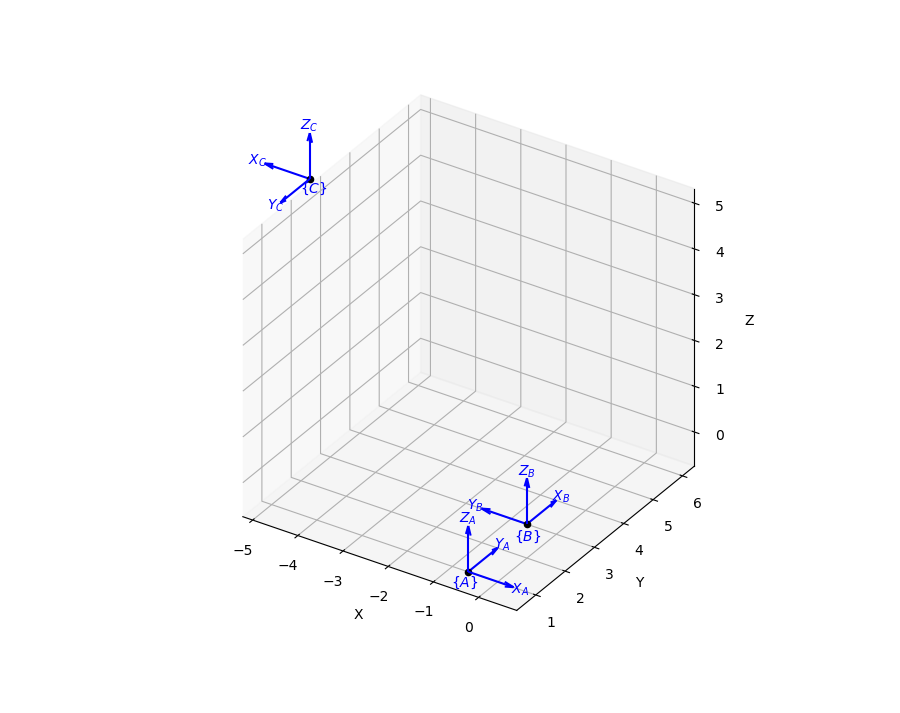

<Axes3DSubplot:xlabel='X', ylabel='Y'>

In [13]:
trplot(R1_eval, frame = "B", dims = [-10,5]) # Puede tirar error con dims, colocar [xmin,xmax,ymin,ymax,zmin,zmax]
trplot(R0.A, frame = "A")
trplot( T_eval, frame='C')